In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
import pandas as pd

In [7]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# 60k ảnh train
X_train.shape

(60000, 28, 28)

In [11]:
# 10k ảnh test
X_test.shape

(10000, 28, 28)

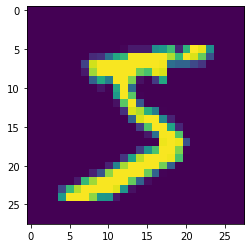

In [8]:
plt.imshow(X_train[0])

In [13]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 10)                2

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0222 - accuracy: 0.9980 - val_loss: 0.4908 - val_accuracy: 0.9793
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0245 - accuracy: 0.9976 - val_loss: 0.6022 - val_accuracy: 0.9799
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0290 - accuracy: 0.9976 - val_loss: 0.5911 - val_accuracy: 0.9802
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229 - accuracy: 0.9979 - val_loss: 0.5830 - val_accuracy: 0.9814
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0298 - accuracy: 0.9980 - val_loss: 0.6579 - val_accuracy: 0.9809
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0271 - accuracy: 0.9980 - val_loss: 0.8448 - val_accuracy: 0.9820
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0245 - accuracy: 0.9983 - val_loss: 0.7769 - val_accuracy:

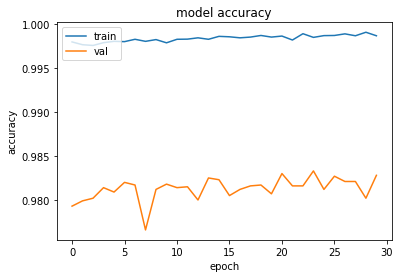

In [27]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

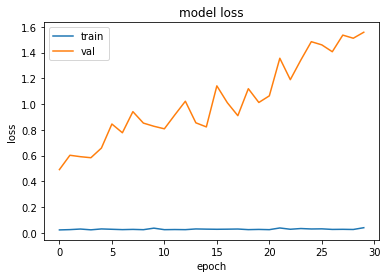

In [28]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
(X_train, y_train), (X_test1, y_test) = mnist.load_data()
y_hat = model.predict(X_test1[1:1])
y_hat

1/1 [==============================] - 0s 120ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [30]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([7])

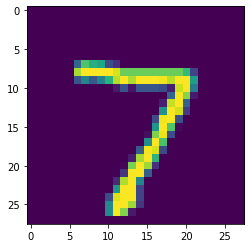

In [31]:
plt.imshow(X_test1[0])